# Target Backends

## Set target

Two options to set the target:

1. Define the target when running the program:
```bash
python3 program.py [...] --target <target_name>
```

2. Target can be defined in the application code:
`cudaq.set_target("target_name")` . Then, to run the program, drop the target flag:
`python3 program.py [...]`


## Target name

1. State vector simulators:
    - Single-GPU (Default if an NVIDIA GPU and CUDA runtime libraries are available): `python3 program.py [...] --target nvidia`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target nvidia --target-option=mgpu`
2. Tensor network simulator:
    - Single-GPU: `python3 program.py [...] --target tensornet`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target tensornet`
3. Matrix Product State:
    - Only supports single-GPU simulation: `python3 program.py [...] --target tensornet-mps`
4. NVIDIA Quantum Cloud
    - Run any of the above backends using NVIDIA-provided cloud GPUs (early access only). To learn more, visit [this page](https://www.nvidia.com/en-us/solutions/quantum-computing/cloud/).
    - E.g. `cudaq.set_target('nvqc', backend='tensornet')`
5. Quantum hardware backend (to learn more, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/hardware.html)):
    - ```cudaq.set_target('QPU_name')```. QPU_name could be `ionq`, `quantinuum`, `iqm`, `oqc`, ...etc.


To learn more about CUDA-Q backends, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/backends.html)

In [1]:
import cudaq
from time import perf_counter

In [2]:
@cudaq.kernel
def ghz(n: int):
    q = cudaq.qvector(n)
    h(q[0])

    for i in range(1, n):
        cx(q[0], q[i])

Run with CPU

In [ ]:
cudaq.set_target("qpp-cpu")

In [3]:
counts = cudaq.sample(ghz, 10)
print(counts)

{ 0000000000:502 1111111111:498 }



Statevector simulation tiem scales exponentially.

In [ ]:
cudaq.set_target("qpp-cpu")

In [ ]:
cpu_times = []
for n in range(10, 22):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    cpu_times.append((n, end - start))

In [4]:
print(cpu_times)

[(10, 0.0010073259472846985), (11, 0.0009407326579093933), (12, 0.0016491590067744255), (13, 0.002335714176297188), (14, 0.004211346618831158), (15, 0.008474769070744514), (16, 0.017979825846850872), (17, 0.037077185697853565), (18, 0.07816819753497839), (19, 0.17403855547308922), (20, 0.37759845610708), (21, 1.029000244103372)]


Simulation with GPU is also exponential, but faster than CPUs for large number of qubits:

In [ ]:
# Use GPU
cudaq.set_target("nvidia")

In [ ]:
gpu_times = []
for n in range(10, 30):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    gpu_times.append((n, end - start))

In [5]:
print(gpu_times)

[(10, 0.6466750372201204), (11, 0.0030373772606253624), (12, 0.0011538509279489517), (13, 0.00209631584584713), (14, 0.001116560772061348), (15, 0.001119145192205906), (16, 0.0014070253819227219), (17, 0.0015500634908676147), (18, 0.0021775979548692703), (19, 0.0017160037532448769), (20, 0.0019186930730938911), (21, 0.001883537508547306), (22, 0.0019859494641423225), (23, 0.0024080388247966766), (24, 0.002992534078657627), (25, 0.004775232635438442), (26, 0.008397654630243778), (27, 0.01570941600948572), (28, 0.0845627523958683), (29, 0.1487216278910637)]


In [ ]:
# Visualize
import matplotlib.pyplot as plt

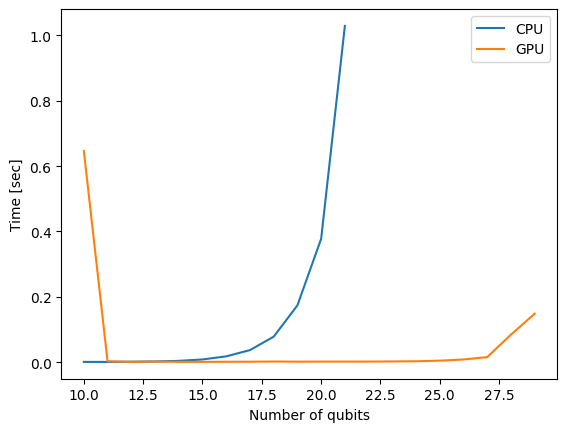

In [6]:
plt.plot([i[0] for i in cpu_times], ([i[1] for i in cpu_times]), label="CPU")
plt.plot([i[0] for i in gpu_times], ([i[1] for i in gpu_times]), label="GPU")
plt.xlabel("Number of qubits")
plt.ylabel("Time [sec]")
plt.legend()
plt.savefig("cpugpu.png")

In [7]:
### Version information
print(cudaq.__version__)

CUDA-Q Version cu12-0.9.0 (https://github.com/NVIDIA/cuda-quantum 77a1c80a18896b4c7ff4ece99f06e6a62c8a28ef)
